In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [98]:
ds=pd.read_csv(r"C:\datasets\bank-full.csv",sep=';')

In [99]:
ds.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [100]:
ds.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [101]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [102]:
ds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [103]:
ds.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [104]:
ds.job.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: job, Length: 45211, dtype: bool

In [105]:
ds.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [106]:
ds.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [107]:
ds.shape

(45211, 17)

In [108]:
ds.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Heatmap

<Axes: >

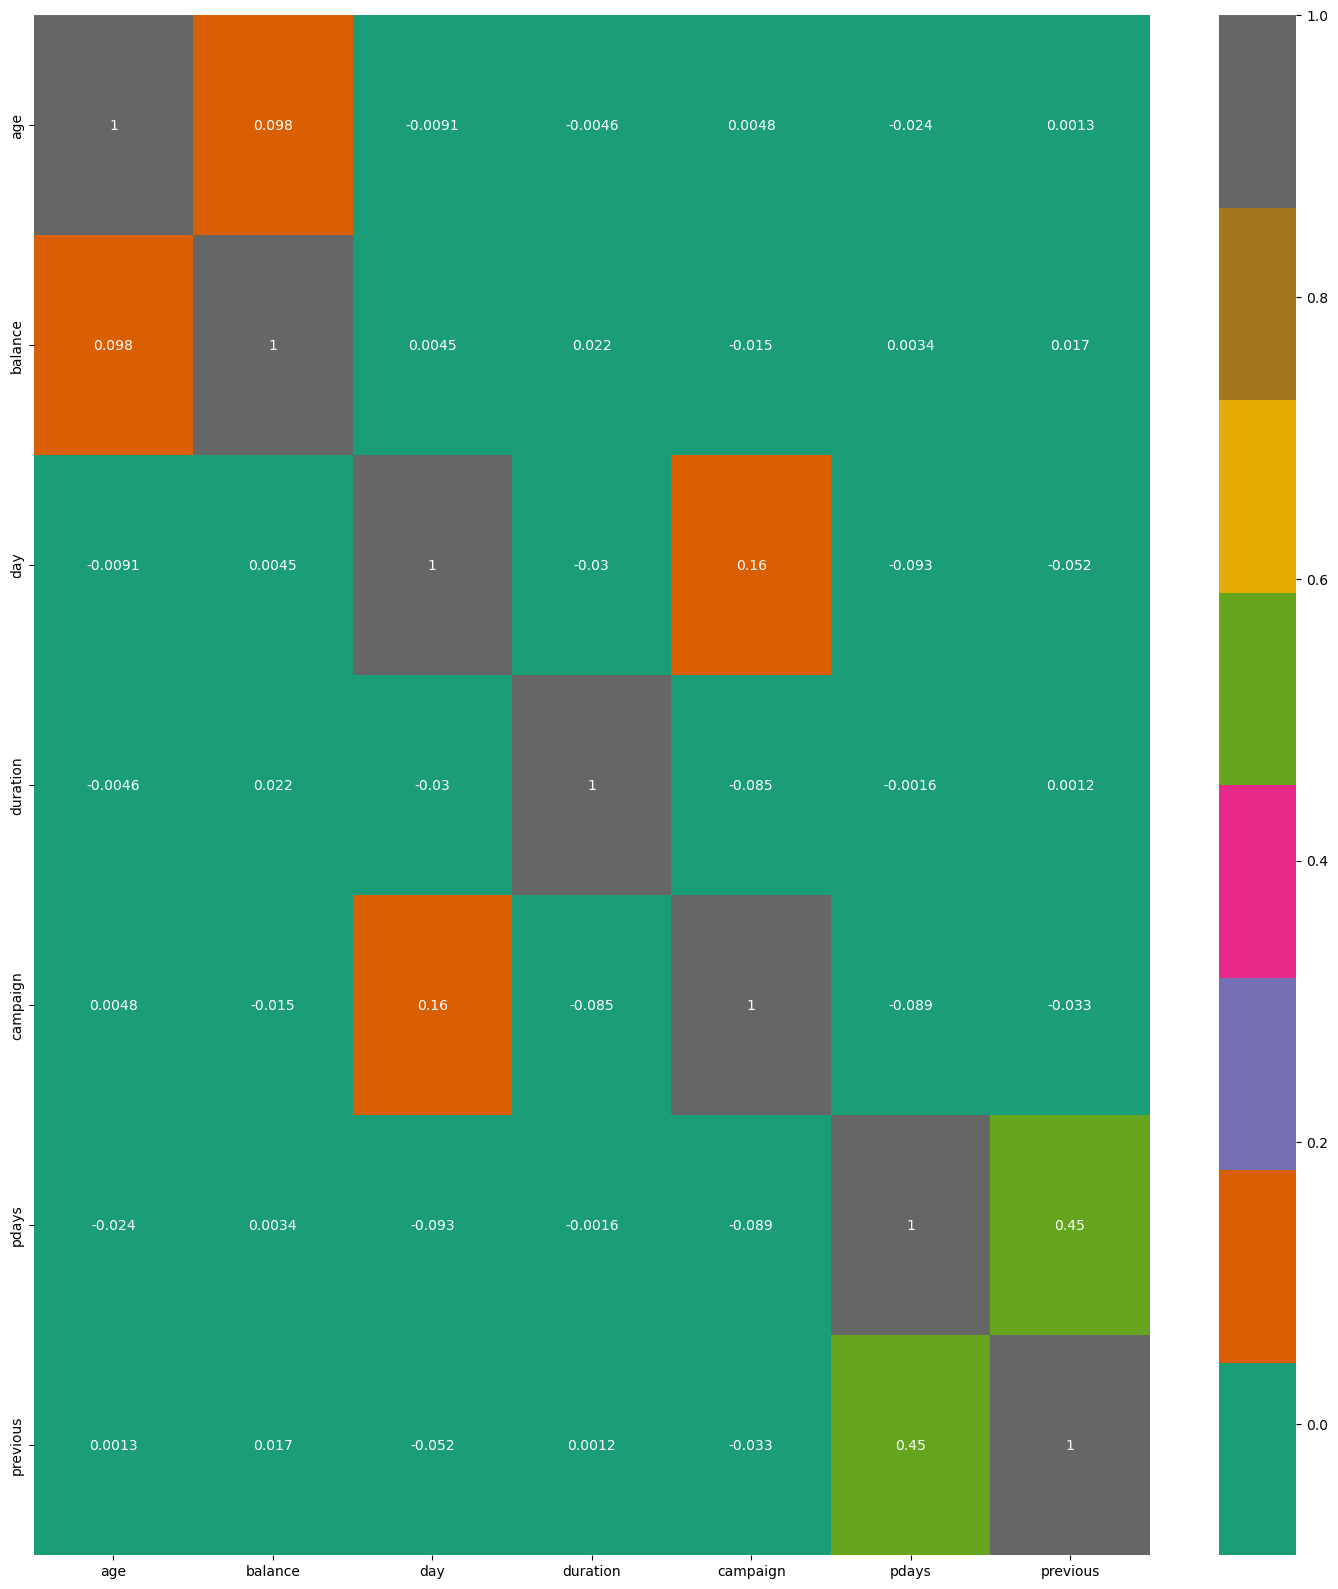

In [109]:
plt.figure(figsize=(18,20))
sns.heatmap(ds.corr(),cmap="Dark2",annot=True)

In [110]:
new_data=ds
data = pd.get_dummies(new_data['job'])
data

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
new_data['admin.'] = data['admin.'].to_list()
new_data['blue-collar']=data['blue-collar'].to_list()
new_data['entrepreneur']=data['entrepreneur'].to_list()
new_data['housemaid']=data['housemaid'].to_list()
new_data['management']=data['management'].to_list()
new_data['retired']=data['retired'].to_list()
new_data['self-employed']=data['self-employed'].to_list()
new_data['services']=data['services'].to_list()
new_data['student']=data['student'].to_list()
new_data['technician']=data['technician'].to_list()
new_data['unemployed']=data['unemployed'].to_list()
new_data['unknown']=data['unknown'].to_list()

In [112]:
new_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,0,0,0,0,1,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,0,0,0,0,0,0,0,0


In [113]:
new_data.drop('job', axis='columns',inplace=True)

In [114]:
new_data

,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,married,secondary,no,668,no,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [115]:
new_data.corr()

,age,balance,day,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,0.086650,-0.023571,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,0.001661,0.067797,0.046900,0.017850,-0.038151,0.001233,-0.016183,0.009023,0.010784
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,0.003955,0.019021,-0.010123,0.005062,-0.006531,-0.015894,0.032517,-0.006382,-0.011199
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,-0.008046,-0.008323,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,0.003097,0.016686,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,-0.031350,-0.007871,-0.006315,-0.010356,0.005710,0.024486,-0.013478,-0.010411,-0.015366
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,-0.015204,0.019579,0.005818,-0.002371,-0.010926,0.023556,-0.001123,-0.008504,-0.009068
admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,-0.060349,-0.184835,-0.082511,-0.068364,-0.114309,-0.052308,-0.161505,-0.061907,-0.028774
blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,-0.087951,-0.269376,-0.120251,-0.099633,-0.166592,-0.076234,-0.235376,-0.090223,-0.041935
entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,-0.030969,-0.094850,-0.042342,-0.035082,-0.058659,-0.026843,-0.082878,-0.031768,-0.014766


In [116]:
new_data.isnull().sum()

age              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
admin.           0
blue-collar      0
entrepreneur     0
housemaid        0
management       0
retired          0
self-employed    0
services         0
student          0
technician       0
unemployed       0
unknown          0
dtype: int64

In [117]:
new_data.dtypes

age               int64
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
admin.            int64
blue-collar       int64
entrepreneur      int64
housemaid         int64
management        int64
retired           int64
self-employed     int64
services          int64
student           int64
technician        int64
unemployed        int64
unknown           int64
dtype: object

In [118]:
new_data.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown'],
      dtype='object')

In [119]:
new_data.drop('marital',axis=1,inplace=True)

In [120]:
new_data.drop(['education','default','contact','housing','loan'], axis=1,inplace=True)


In [121]:
new_data

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,2143,5,may,261,1,-1,0,unknown,no,...,0,0,1,0,0,0,0,0,0,0
1,44,29,5,may,151,1,-1,0,unknown,no,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,may,76,1,-1,0,unknown,no,...,1,0,0,0,0,0,0,0,0,0
3,47,1506,5,may,92,1,-1,0,unknown,no,...,0,0,0,0,0,0,0,0,0,0
4,33,1,5,may,198,1,-1,0,unknown,no,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,unknown,yes,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,nov,456,2,-1,0,unknown,yes,...,0,0,0,1,0,0,0,0,0,0
45208,72,5715,17,nov,1127,5,184,3,success,yes,...,0,0,0,1,0,0,0,0,0,0
45209,57,668,17,nov,508,4,-1,0,unknown,no,...,0,0,0,0,0,0,0,0,0,0


# Heat Map

<Axes: >

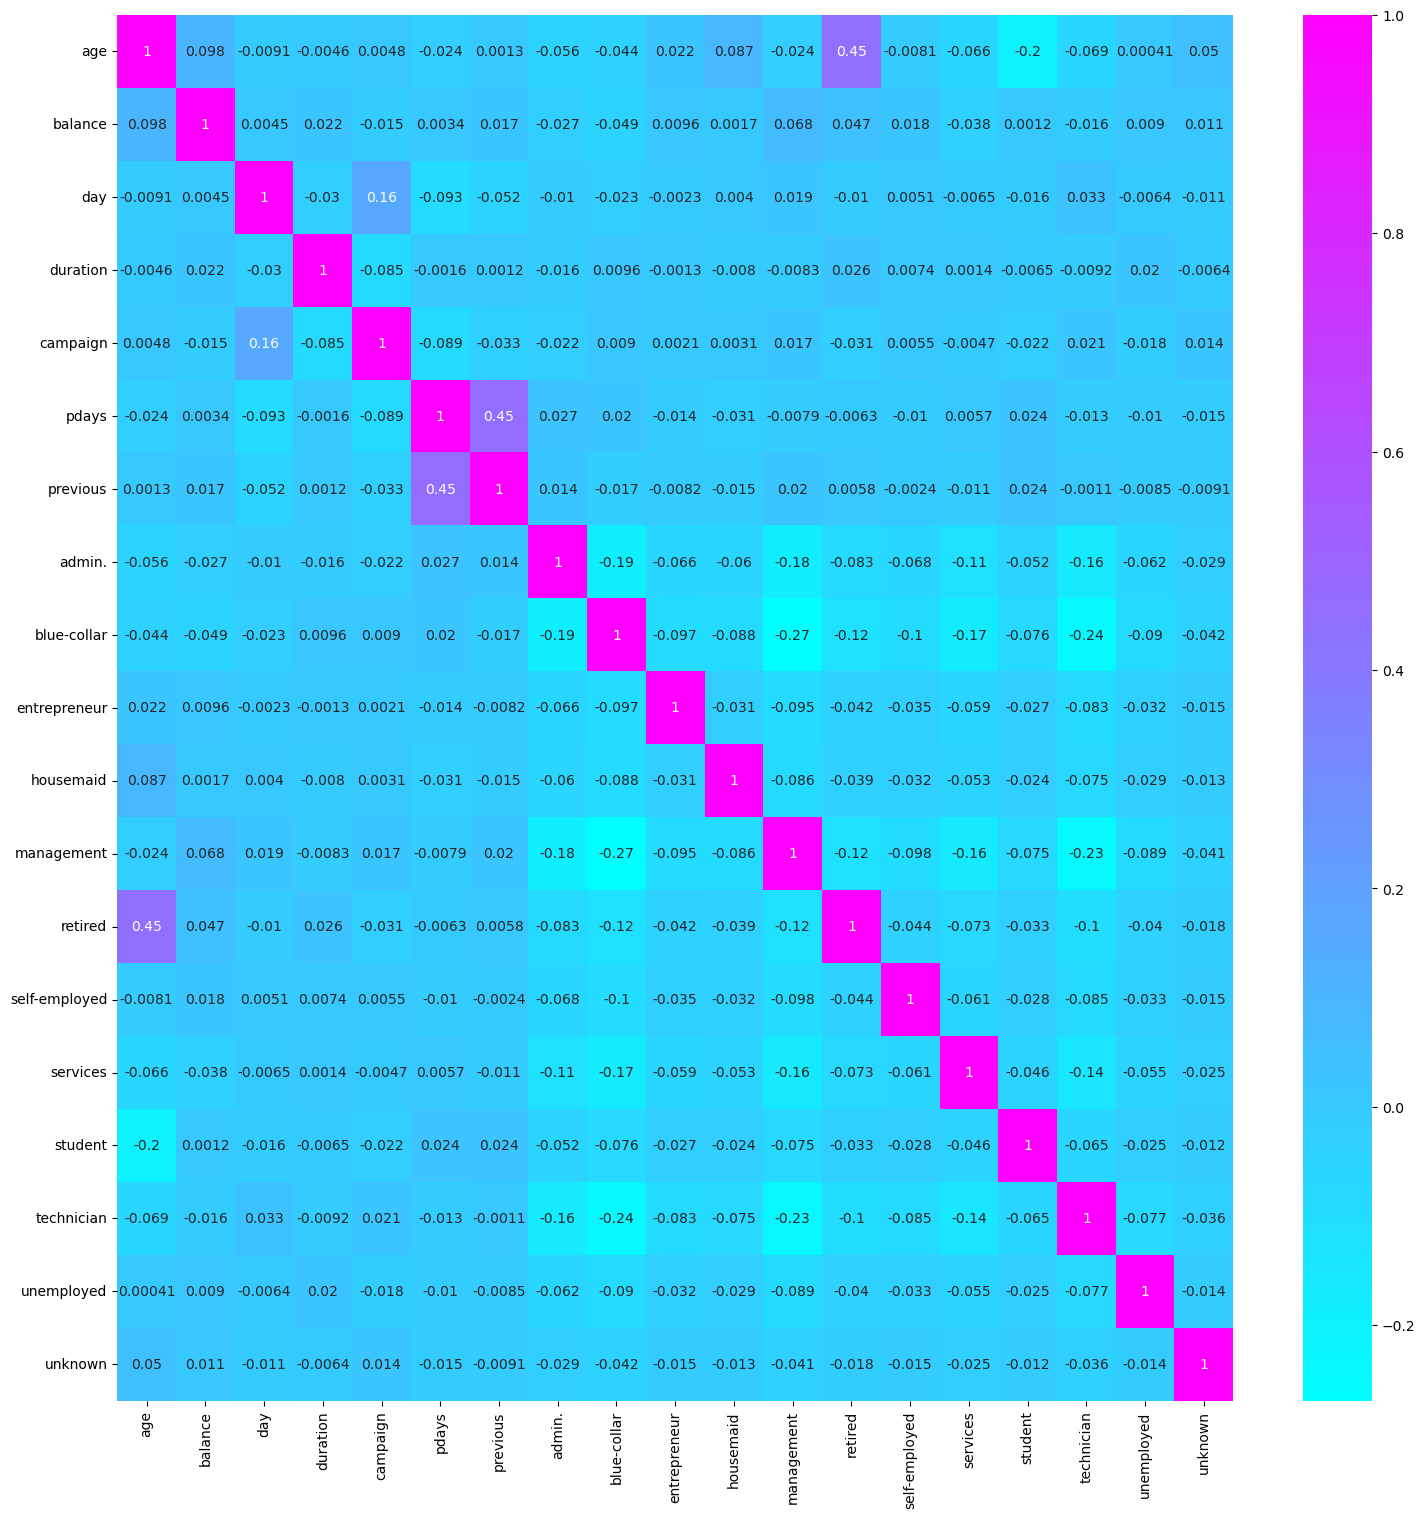

In [152]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),cmap='cool',annot=True)

# Training the data

In [135]:
import numpy as np
predict = 'y' 

features = ['age','balance','day','duration','campaign','pdays','previous',
            'y','admin.','blue-collar','entrepreneur','housemaid',
            'management','retired','self-employed','services','student',
            'technician','unemployed','unknown']

x = np.array(new_data[features].drop(columns=[predict]))
y = np.array(new_data[predict])


In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.7)

In [149]:
x_train.shape

(13563, 19)

In [150]:
y_train.shape

(13563,)

In [151]:
x_test.shape,y_test.shape

((31648, 19), (31648,))

# Decision Tree Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [146]:
predictions=model.predict(x_test)
model.score(x_test, predictions)*100

100.0